Setup

In [14]:
!cat ~/.keras/keras.json

{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "tensorflow"
}

Pretrained Networks (ImageNet)

In [ ]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import cv2
from matplotlib import pyplot as plt 

In [ ]:
def pretrained_imagenet(image_filepath, model):
    # define a dictionary that maps model names to their classes
    # inside Keras
    MODELS = {
        "vgg16": VGG16,
        "vgg19": VGG19,
        "inception": InceptionV3,
        "xception": Xception,  # TensorFlow ONLY
        "resnet": ResNet50
    }

    # esnure a valid model name was supplied via command line argument
    if model not in MODELS.keys():
        raise AssertionError("The --model command line argument should "
            "be a key in the `MODELS` dictionary")

    # initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # if we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if model in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input

    # load our the network weights from disk (NOTE: if this is the
    # first time you are running this script for a given network, the
    # weights will need to be downloaded first -- depending on which
    # network you are using, the weights can be 90-575MB, so be
    # patient; the weights will be cached and subsequent runs of this
    # script will be *much* faster)
    print("[INFO] loading {}...".format(model))
    Network = MODELS[model]
    model = Network(weights="imagenet")

    # load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    print("[INFO] loading and pre-processing image...")
    image = load_img(image_filepath, target_size=inputShape)
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # classify the image
    print("[INFO] classifying image with '{}'...".format(model))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

    # load the image via OpenCV, draw the top prediction on the image,
    # and display the image to our screen
    orig = cv2.imread(image_filepath)
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(orig, "Label: {}".format(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    plt.figure()
    plt.axis("off")
    plt.title("Classification")
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

[INFO] loading vgg16...
[INFO] loading and pre-processing image...
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f360f006a10>'...
1. pool_table: 100.00%
2. grand_piano: 0.00%
3. ping-pong_ball: 0.00%
4. pickup: 0.00%
5. tub: 0.00%


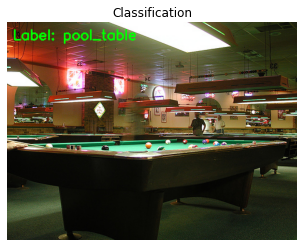

In [ ]:
pretrained_imagenet(image_filepath="drive/MyDrive/pyimagesearch/datasets/examples/example_01.jpg", model="vgg16")

[INFO] loading vgg19...
574717952/574710816 [==============================] - 5s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f360bbe7c10>'...
1. koala: 99.84%
2. mongoose: 0.07%
3. indri: 0.04%
4. titi: 0.02%
5. fox_squirrel: 0.01%


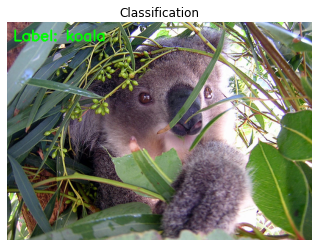

In [ ]:
pretrained_imagenet(image_filepath="drive/MyDrive/pyimagesearch/datasets/examples/example_02.jpg", model="vgg19")

[INFO] loading inception...
96116736/96112376 [==============================] - 1s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f362517a3d0>'...
1. sports_car: 90.89%
2. car_wheel: 0.56%
3. grille: 0.52%
4. racer: 0.45%
5. crash_helmet: 0.14%


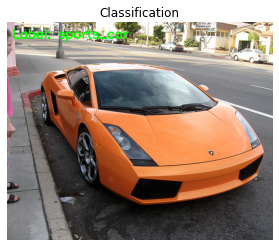

In [ ]:
pretrained_imagenet(image_filepath="drive/MyDrive/pyimagesearch/datasets/examples/example_03.jpg", model="inception")

[INFO] loading xception...
91889664/91884032 [==============================] - 1s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f3609a4f8d0>'...
1. soccer_ball: 94.89%
2. silky_terrier: 0.09%
3. lens_cap: 0.05%
4. golf_ball: 0.04%
5. croquet_ball: 0.04%


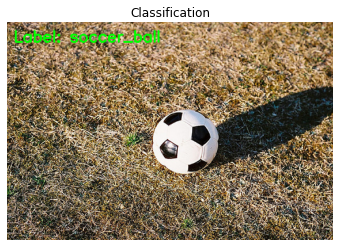

In [ ]:
pretrained_imagenet(image_filepath="drive/MyDrive/pyimagesearch/datasets/examples/example_04.jpg", model="xception")

[INFO] loading resnet...
102973440/102967424 [==============================] - 1s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with '<tensorflow.python.keras.engine.functional.Functional object at 0x7f360b104810>'...
1. canoe: 94.50%
2. paddle: 5.42%
3. sandbar: 0.02%
4. clog: 0.01%
5. speedboat: 0.01%


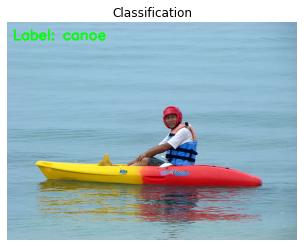

In [ ]:
pretrained_imagenet(image_filepath="drive/MyDrive/pyimagesearch/datasets/examples/example_05.jpg", model="resnet")